In [1]:
import numpy as np
import utils
import hrr_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

past, present, freq = utils.GetRegularVerbs(True)
N = 1000

In [3]:
dic = hrr_utils.GenerateDefaultDictionary(N)
past, present, freq = utils.Shuffle(past, present, freq)

test_present = present[:int(len(present)*.2)]
test_past = past[:int(len(present)*.2)]

train_present=present[int(len(present)*.2):]
train_past=past[int(len(present)*.2):]

In [4]:
test_present_inp = []
test_past_inp = []

for i in range(len(test_present)):
    ivec = hrr_utils.GetRVClip(test_present[i], dic)
    evec = hrr_utils.GetRVClip(test_past[i], dic)
    test_present_inp.append(ivec)
    test_past_inp.append(evec)
    
test_present_inp = np.array(test_present_inp)
test_past_inp = np.array(test_past_inp)

train_present_inp = []
train_past_inp = []

for i in range(len(train_present)):
    ivec = hrr_utils.GetRVClip(train_present[i], dic)
    evec = hrr_utils.GetRVClip(train_past[i], dic)
    train_present_inp.append(ivec)
    train_past_inp.append(evec)
    

## Regular Clipped Encoding, N=1k 

In [27]:
train_mean = []
train_std = []
test_mean = []
test_std = []

total_vec = np.zeros(N)

# One Pass
# train 
weight = 1.
discount = .5
train_past_inp, train_present_inp = utils.Shuffle(train_past_inp, train_present_inp)
for _ in range(train_past_inp.shape[0]):
    if _%1 == 1:
        print _, weight
        weight = weight*discount
        values = []
        for j in range(len(test_past_inp)):
            # Test, generalization set
            past_vec = test_past_inp[j]
            pres_vec = test_present_inp[j]

            pred_pres = np.sign(np.multiply(past_vec, total_vec))
            pred = np.dot(pred_pres, pres_vec)
            values.append(pred)
        values = np.array(values)
        test_mean.append(values.mean())
        test_std.append(values.std())
        
        values = []
        for k in range(_):
            # Train, already seen set
            past_vec = train_past_inp[k]
            pres_vec = train_present_inp[k]
            
            pred_pres = np.sign(np.multiply(past_vec, total_vec))
            pred = np.dot(pred_pres, pres_vec)
            values.append(pred)
        values = np.array(values)
        train_mean.append(values.mean())
        train_std.append(values.std())
            
    past_vec = train_past_inp[_]
    pres_vec = train_present_inp[i]
    
    update = (total_vec * past_vec) - pres_vec
    total_vec += weight*update*np.multiply(pres_vec, past_vec)


1 1.0
101 0.5
201 0.25
301 0.125
401 0.0625
501 0.03125
601 0.015625
701 0.0078125
801 0.00390625
901 0.001953125
1001 0.0009765625
1101 0.00048828125
1201 0.000244140625
1301 0.0001220703125
1401 6.103515625e-05
1501 3.0517578125e-05
1601 1.52587890625e-05
1701 7.62939453125e-06
1801 3.81469726562e-06
1901 1.90734863281e-06


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

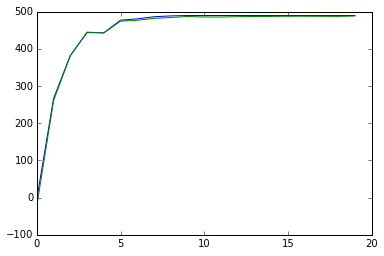

In [30]:
plt.plot(test_mean)
plt.plot(train_mean)